In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasetkdd.csv')
# Remove rows with any null values
df = df.dropna()
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df.head()

# Standardize the features
numerical_features = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_encoded = label_encoder.fit_transform(df['class'])
print(y_encoded)

[1 1 0 ... 0 1 0]


In [ ]:
#  convert the non numerical values into numberical value and show the head

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Use LabelEncoder to convert the categorical values to numerical values
        df[column] = label_encoder.fit_transform(df[column])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,-0.112481,1,20,9,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,1
1,-0.112481,2,44,9,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,1
2,-0.112481,1,49,5,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,0
3,-0.112481,1,24,9,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,1
4,-0.112481,1,24,9,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,1


In [ ]:
from sklearn.cluster import DBSCAN

features = ['dst_bytes', 'src_bytes', 'urgent', 'dst_host_same_srv_rate','dst_host_diff_srv_rate']
x= df[features]

In [ ]:
x.head()
x = x.sample(frac=0.1,random_state=42)

In [ ]:
eps = 0.5  # Adjust based on your data
min_samples = 10
# Adjust based on your data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(x)


Number of noise points: 27


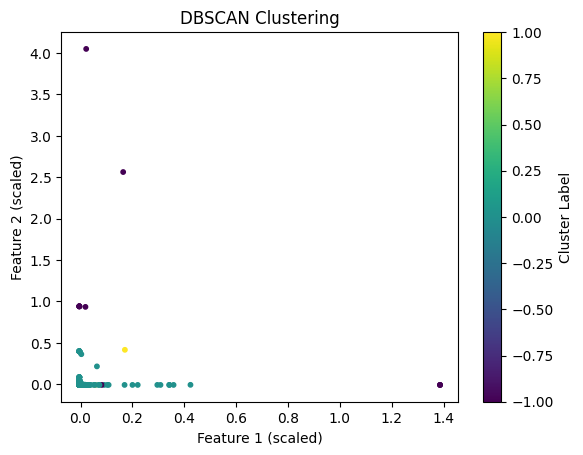

In [ ]:
import matplotlib.pyplot as plt


# Add cluster labels to the DataFrame
x['Cluster'] = cluster_labels

# Analyze noise points (label: -1)
noise_points = x[x['Cluster'] == -1]
print(f"Number of noise points: {len(noise_points)}")

# Save the dataset with cluster labels
x.to_csv('kdd_data_with_clusters.csv', index=False)

# Visualize clusters (assumes you’re working with scaled data)
plt.scatter(
    x.iloc[:, 0],  # Use the first feature
    x.iloc[:, 1],  # Use the second feature
    c=cluster_labels,
    cmap='viridis',
    s=10
)



plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
# Assuming x is your dataset after sampling (x.head() already sampled)
# Ensure the y_encoded is also sampled the same way

# Align y_encoded with the sampled data
y_encoded_sampled = y_encoded[:len(x)]  # Slice y_encoded to match the downsampled data size

# Convert DBSCAN noise points to 1 (anomaly) and non-noise points to 0 (normal)
y_pred_dbscan = (cluster_labels == -1).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_encoded_sampled, y_pred_dbscan)
recall = recall_score(y_encoded_sampled, y_pred_dbscan)
f1 = f1_score(y_encoded_sampled, y_pred_dbscan)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_encoded_sampled, y_pred_dbscan)
print("Confusion Matrix:")
print(cm)


Precision: 0.5925925925925926
Recall: 0.00202020202020202
F1-score: 0.0040266767333585
Confusion Matrix:
[[6921   11]
 [7904   16]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

# Apply PCA with all components initially
pca = PCA()
pca.fit(df[numerical_features])

cumulative_variance = pca.explained_variance_ratio_.cumsum()

n_components = len(cumulative_variance[cumulative_variance < 0.90]) + 1
print(f"Optimal number of components to explain 90% variance: {n_components}")

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df[numerical_features])

# Create a new DataFrame with the reduced features
df_pca = pd.DataFrame(data = df_pca, columns = [f'PC{i}' for i in range(1, n_components + 1)])
print(df_pca.head())



# Range of k values to test
k_values = range(1, 11)

# List to store inertia values
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

print("Inertia values for each k:", inertia)



Optimal number of components to explain 90% variance: 20
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.625634 -0.073829 -0.014517  0.166455  0.318661  0.190437  0.114868   
1 -0.759585  0.940796  0.034487  1.262028  0.765898  1.743790  0.515231   
2 -3.736297 -1.948481  0.018670  0.128988  0.235855 -0.436197 -0.041618   
3  2.363575 -0.946242 -0.081421 -0.242785  0.076367 -0.959865 -0.039731   
4  2.152462 -0.733046 -0.128061 -1.061153 -0.768710 -0.428583  0.077522   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.462148  0.124502  0.373525  0.066409  0.165439 -0.009255 -0.002020   
1  2.280280 -0.910126 -0.034708 -0.092586 -0.357197  0.007202 -0.083958   
2 -0.120314  0.187123  0.026017  0.012113  0.025735  0.010037 -0.000124   
3  0.073699  0.008618 -0.138571  0.028759 -0.071815  0.009760 -0.016483   
4  0.337183 -0.011759 -0.141357 -0.020861 -0.052097  0.014180 -0.009391   

       PC15      PC16      PC17      PC18

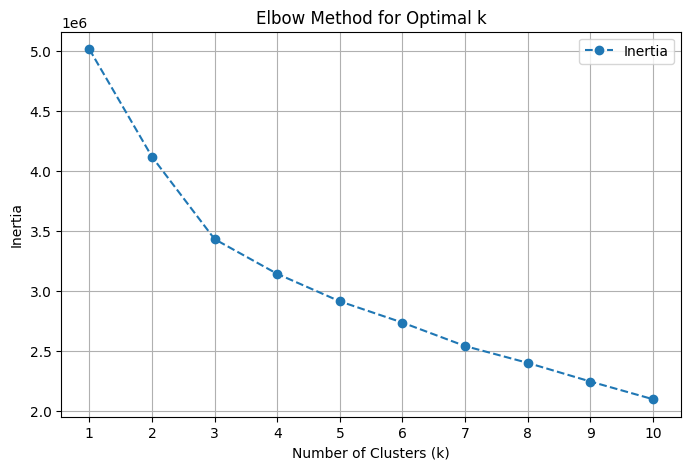

In [ ]:
# Plot inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', label='Inertia')
plt.xticks(k_values)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.legend()
plt.show()


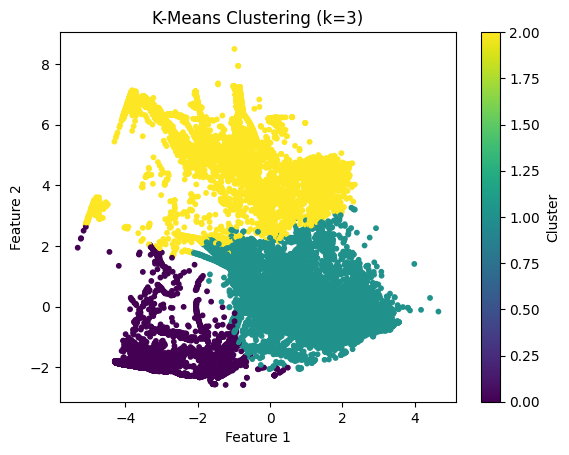

In [ ]:
# Replace 'optimal_k' with the selected number of clusters from the elbow method
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_pca)


# Add cluster labels to the dataset
df_pca['Cluster'] = kmeans.labels_

# Visualize clustering if the dataset has two features
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=df_pca['Cluster'], cmap='viridis', s=10)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


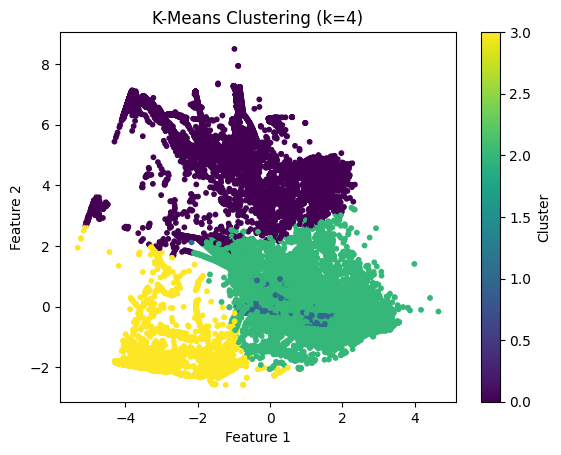

In [ ]:
# Replace 'optimal_k' with the selected number of clusters from the elbow method
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_pca)


# Add cluster labels to the dataset
df_pca['Cluster'] = kmeans.labels_

# Visualize clustering if the dataset has two features
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=df_pca['Cluster'], cmap='viridis', s=10)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

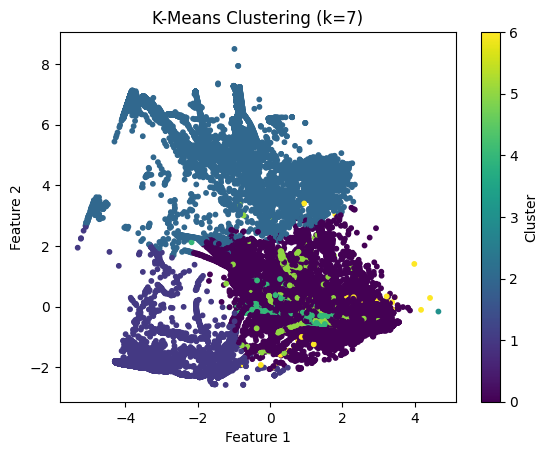

In [ ]:

optimal_k = 7
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(df_pca)


# Add cluster labels to the dataset
df_pca['Cluster'] = kmeans.labels_

# Visualize clustering if the dataset has two features
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=df_pca['Cluster'], cmap='viridis', s=10)
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:


# Calculate silhouette scores for different k values
from sklearn.metrics import silhouette_score

k_values = [3, 4, 7] # Example k values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize with the best random_state
    kmeans.fit(df_pca.drop('Cluster', axis=1))  # Fit on PCA features excluding the 'Cluster' column
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_pca.drop('Cluster', axis=1), cluster_labels)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 3, the average silhouette_score is : 0.5047426787575019
For n_clusters = 4, the average silhouette_score is : 0.5090842413837638
For n_clusters = 7, the average silhouette_score is : 0.48657718415808804


In [ ]:

from sklearn.metrics import pairwise_distances
distances = pairwise_distances(df_pca.iloc[:, :-1], kmeans.cluster_centers_)  # Exclude 'Cluster' column

# Define threshold for anomalies
threshold = distances.mean() + 2 * distances.std()  # Adjust the threshold as needed

# Identify anomalies
anomalies_kmeans = df_pca[distances.min(axis=1) > threshold]
print(f"Number of anomalies detected by K-means: {len(anomalies_kmeans)}")


Number of anomalies detected by K-means: 0


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming x is your dataset after sampling (x.head() already sampled)
# Ensure the y_encoded is also sampled the same way
y_encoded_sampled = y_encoded[:len(x)]  # Slice y_encoded to match the downsampled data size

# Apply K-Means clustering with the selected number of clusters (optimal_k)
optimal_k = 3  # Example: choose the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(x)

# Predict the cluster labels for the data
y_pred_kmeans = kmeans.labels_

# If you want to treat some points as anomalies, you can apply a similar threshold strategy:
# For example, points far from the cluster centroids could be considered anomalies
# We can calculate the distance to the centroids using pairwise_distances
from sklearn.metrics import pairwise_distances

# Compute the pairwise distance between points and the cluster centers
distances = pairwise_distances(x, kmeans.cluster_centers_)

# Set a threshold based on the distances (you can adjust this based on your data)
threshold = distances.mean() + 2 * distances.std()  # Adjust as needed
anomalies_kmeans = x[distances.min(axis=1) > threshold]

# Treat anomalies as label 1 and non-anomalies as label 0
y_pred_kmeans_anomalies = (distances.min(axis=1) > threshold).astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(y_encoded_sampled, y_pred_kmeans_anomalies)
recall = recall_score(y_encoded_sampled, y_pred_kmeans_anomalies)
f1 = f1_score(y_encoded_sampled, y_pred_kmeans_anomalies)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
cm = confusion_matrix(y_encoded_sampled, y_pred_kmeans_anomalies)
print("Confusion Matrix:")
print(cm)


Precision: 1.0
Recall: 0.0002525252525252525
F1-score: 0.0005049229992426155
Confusion Matrix:
[[6932    0]
 [7918    2]]
